# Data Visualization

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
!pip3 install tsnecuda==3.0.1+cu118 -f https://tsnecuda.isx.ai/tsnecuda_stable.html
!pip3 install tsnecuda
from tsnecuda import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Looking in links: https://tsnecuda.isx.ai/tsnecuda_stable.html


In [2]:
import pandas as pd
df = pd.read_csv('../data/data100.csv') # Loading data for topology 3

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687930 entries, 0 to 4687929
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   datapath_id               int64  
 1   flow_id                   int64  
 2   ip_src                    int64  
 3   tp_src                    int64  
 4   ip_dst                    int64  
 5   tp_dst                    int64  
 6   ip_proto                  int64  
 7   icmp_code                 int64  
 8   icmp_type                 int64  
 9   flow_duration_sec         int64  
 10  flow_duration_nsec        int64  
 11  idle_timeout              int64  
 12  hard_timeout              int64  
 13  flags                     int64  
 14  packet_count              int64  
 15  byte_count                int64  
 16  packet_count_per_second   float64
 17  packet_count_per_nsecond  float64
 18  byte_count_per_second     float64
 19  byte_count_per_nsecond    float64
 20  label                   

#### Performing t-sne on GPU. (Using Google Colab) Go to `Runtime` and `change runtime type` to GPU

In [4]:
if "timestamp" in df.columns:
  df.drop("timestamp", axis=1, inplace = True)
cat_features = ["datapath_id", "ip_src", "ip_dst", "ip_proto", "icmp_code", "icmp_type", "flags"]
num_features = ["flow_id", "tp_src", "tp_dst", "flow_duration_sec", "flow_duration_nsec", "idle_timeout", "hard_timeout", "packet_count", "byte_count", "packet_count_per_second", "packet_count_per_nsecond", "byte_count_per_second", "byte_count_per_nsecond"]
number_of_features = len(cat_features) + len(num_features)

In [5]:
x = pd.DataFrame()

# Min-Max Function
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    column_normalized = (column - min_val) / (max_val - min_val)
    return column_normalized

# We move forward Column by column to see which column is categorical or numerical.
for i in range(number_of_features):
    feature = df.columns[i]
    if feature in cat_features:
        x = pd.concat([x, pd.get_dummies(df[feature], prefix=feature, dtype='int8')],axis=1)
    else:
        # Apply min-max normalization to the specified column
        x = pd.concat([x, min_max_normalize(df[feature])],axis=1)
x

,datapath_id_1,datapath_id_2,datapath_id_3,datapath_id_4,datapath_id_5,datapath_id_6,datapath_id_7,datapath_id_8,datapath_id_9,datapath_id_10,...,flow_duration_nsec,idle_timeout,hard_timeout,flags_0,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond
0,0,0,0,0,1,0,0,0,0,0,...,0.335335,NaN,NaN,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0,0,0,0,0,0,1,0,0,0,...,0.340340,NaN,NaN,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0,0,0,0,0,0,1,0,0,0,...,0.338338,NaN,NaN,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1,0,0,0,0,0,0,0,0,0,...,0.443443,NaN,NaN,1,1.877614e-04,2.306869e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1,0,0,0,0,0,0,0,0,0,...,0.445445,NaN,NaN,1,2.635086e-04,7.326345e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687925,1,0,0,0,0,0,0,0,0,0,...,0.418418,NaN,NaN,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4687926,1,0,0,0,0,0,0,0,0,0,...,0.852853,NaN,NaN,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4687927,1,0,0,0,0,0,0,0,0,0,...,0.825826,NaN,NaN,1,1.147686e-07,3.670268e-09,1.262054e-07,1.279809e-09,1.615056e-09,4.675442e-12
4687928,1,0,0,0,0,0,0,0,0,0,...,0.640641,NaN,NaN,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### Data Encoding

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


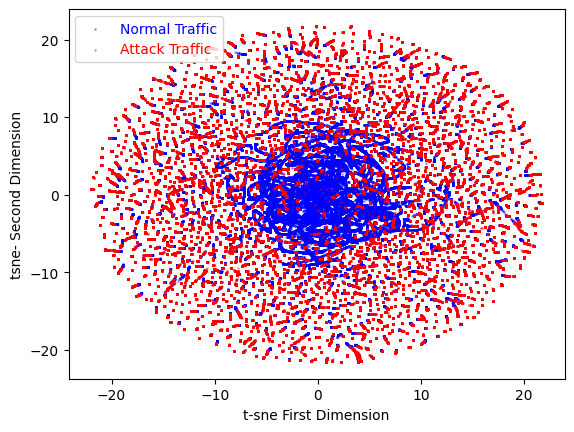

In [6]:
# Randomly sample the data
sampled_data = df.sample(frac=0.08)
sampled_x = sampled_data.drop("label", axis=1)
y_sample = sampled_data["label"]
# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(sampled_x)

# Perform t-SNE
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(pca_components)

# Get the labels
labels = [0, 1]
colors = ['blue', 'red']
labels_repr = ["Normal Traffic", "Attack Traffic"]
# Visualize the data
# Create a scatter plot for each class
for label, color in zip(labels, colors):
    class_indices = np.where(y_sample == label)
    plt.scatter(tsne_components[class_indices, 0], tsne_components[class_indices, 1], c=color, s=1, alpha=0.3, label=label)
plt.legend(labels=labels_repr, labelcolor=['blue', 'red'])
plt.xlabel("t-sne First Dimension")
plt.ylabel("tsne- Second Dimension")
plt.show()